In [1]:
import math
import numpy as np
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
# from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import metrics
from sklearn import tree
import scattertext as st
from pprint import pprint
import operator
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
## Initial Spam Classification with NB

In [3]:
# filename = 'sms_data'
# sms_df = pd.read_csv(filename, header=None, sep='	', names=['class_sms', 'sms'])
# sms_df['sms'] = sms_df['sms'].str.replace(r'\d+', '')

# sms_df['sms'] = sms_df['sms'].apply(lambda x: x.split())
# sms_df['sms'] = sms_df['sms'].apply(lambda x: [word for word in x if len(word) > 2])
# sms_df['sms'] = sms_df['sms'].apply(lambda x: ', '.join(x))
# # print(sms_df['sms'])

# X = sms_df.sms
# y = sms_df.class_sms

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
# vect = CountVectorizer()
# X_train_dtm = vect.fit_transform(X_train) 
# # print(vect.get_feature_names())
# X_test_dtm = vect.transform(X_test)

# nb = MultinomialNB()
# nb.fit(X_train_dtm, y_train)
# y_pred_class = nb.predict(X_test_dtm)  
# false_positive = X_test[(y_test == 'spam') & (y_pred_class == 'ham')]
# false_negative = X_test[(y_test == 'ham') & (y_pred_class == 'spam')]
# # print(false_positive)
# # print(false_negative)

# # print(y_test.value_counts())  # examine the class distribution of the testing set (using a Pandas Series method)
# # print(y_test.value_counts().head(1) / len(y_test)) 
# print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class)) # 0.9885
# confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
# false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])
# print('False Positive Rate:', false_positive_rate*100) # 5.405% <-- terrible!

In [4]:
# X_train_tokens = vect.get_feature_names()
# ham_token_count = nb.feature_count_[0, :]
# spam_token_count = nb.feature_count_[1, :]
# tokens = pd.DataFrame({'token': X_train_tokens, 'ham': ham_token_count, 'spam': spam_token_count})
# tokens['ham'] = tokens.ham + 1
# tokens['spam'] = tokens.spam + 1
# tokens['ham'] = tokens.ham / nb.class_count_[0]
# tokens['spam'] = tokens.spam / nb.class_count_[1]
# tokens['ham_ratio'] = tokens.ham / tokens.spam
# tokens['spam_ratio'] = tokens.spam / tokens.ham
# print(tokens.sort_values('ham_ratio', ascending=False).head(10))  # top 10 tokens predictive for 5-star
# print(tokens.sort_values('spam_ratio', ascending=False).head(10))  # top 10 tokens predictive for 5-star
# print(tokens.sort_values('one_star_ratio', ascending=False).head(10))  # top 10 tokens predictive for 1-star

In [5]:
## The 2 blocks of code below produce the HTML text visualization

In [6]:
# nlp = st.WhitespaceNLP.whitespace_nlp
# corpus = st.CorpusFromPandas(sms_df, 
#                               category_col='class_sms', 
#                               text_col='sms',
#                               nlp=nlp).build()
# term_freq_df = corpus.get_term_freq_df()
# term_freq_df['spam'] = corpus.get_scaled_f_scores('spam')
# pprint(list(term_freq_df.sort_values(by='spam', ascending=False).index[:10])) # words most associated with spam
# term_freq_df['ham'] = corpus.get_scaled_f_scores('ham')
# pprint(list(term_freq_df.sort_values(by='ham', ascending=False).index[:10]))  # words most associated with ham

In [7]:
# html = st.produce_scattertext_explorer(corpus,
#           category='spam',
#           category_name='spam',
#           not_category_name='ham',
#           width_in_pixels=1000,
#           )
# open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))

In [8]:
## Post-Naive Bayes: 
# Tokenization (playing around with data, reading RP/posts to get ideas )
# Feature Selection (information gain)
# Evaluation

[[1203    7]
 [  10  174]]
General Accuracy: 0.987804878049
False Positive Rate: 5.4347826087
             precision    recall  f1-score   support

        ham       0.99      0.99      0.99      1210
       spam       0.96      0.95      0.95       184

avg / total       0.99      0.99      0.99      1394

1875    Would,you,like,see,XXX,pics,they,are,hot,they,...
684     sue,years,old,and,work,lapdancer,love,sex.,Tex...
1328    balance,now,next,question:,Who,sang,'Uptown,Gi...
3419    LIFE,has,never,been,this,much,fun,and,great,un...
4949    this,Amy,will,sending,you,free,phone,number,co...
4069    TBS/PERSOLVO.,been,chasing,since,Sept,for£,def...
2823    ROMCAPspam,Everyone,around,should,responding,w...
191     Are,you,unique,enough?,Find,out,from,August.,w...
4256    Block,Breaker,now,comes,deluxe,format,with,new...
4821    Check,Out,Choose,Your,Babe,Videos,@,sms.shsex....
Name: sms, dtype: object


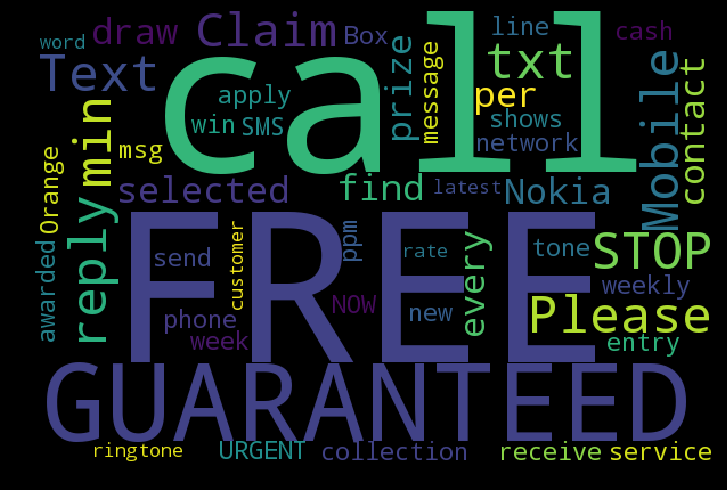

In [20]:
filename = 'sms_data'
sms_df = pd.read_csv(filename, header=None, sep='	', names=['class_sms', 'sms'])

sms_df['sms'] = sms_df['sms'].str.replace(r'\d+', '')
sms_df['sms'] = sms_df['sms'].str.replace(r'\W*\b\w{1,2}\b', '') # regex for replacing words of len less then 2
# sms_df['sms'] = sms_df['sms'].str.replace(r'\d+', '')
sms_df['sms'] = sms_df['sms'].apply(lambda x: x.split())
sms_df['sms'] = sms_df['sms'].apply(lambda x: ','.join(x))
# print(sms_df)
# sms_df.to_csv('new_sms_data3.csv')
# print(len(sms_df.loc[sms_df['class_sms'] == 'spam']))
# sms_df.loc[sms_df['class_sms'] == 'spam'].to_csv('spam_fi2.csv')
# sms_df.loc[sms_df['class_sms']=='spam'].apply(lambda x: x.split())

X = sms_df.sms
y = sms_df.class_sms

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
stopword = stopwords.words('english')
stopword.append('You')
stopword.append('Your')
vect = CountVectorizer(token_pattern=u'(?u)\\b\\w+\\b', lowercase=False, ngram_range=(1,2), stop_words=stopword)

X_train_dtm = vect.fit_transform(X_train) 
X_test_dtm = vect.transform(X_test)

nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)  

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_matrix)
false_positive_rate = confusion_matrix[1][0] / (confusion_matrix[1][0] + confusion_matrix[1][1])

print('General Accuracy:', metrics.accuracy_score(y_test, y_pred_class)) # 0.9885
print('False Positive Rate:', false_positive_rate*100) 
print (classification_report(y_test, y_pred_class))

spam_token_count = nb.feature_count_[1, :] 
X_train_tokens = vect.get_feature_names()
tokens = pd.DataFrame({'token':X_train_tokens, 'spam':spam_token_count})
tokens['spam'] = tokens.spam + 1
tokens['spam'] = tokens.spam / nb.class_count_[1]

# print(tokens.sort_values('spam', ascending=False))  # Common Spam Value Predictor list

false_positive = X_test[(y_test == 'spam') & (y_pred_class == 'ham')]
false_negative = X_test[(y_test == 'ham') & (y_pred_class == 'spam')]
print(false_positive)
# for i in false_positive:
#     print(len(i))
# print(false_negative)
# for i in false_negative:
#     print(len(i))
        
spam_words = tokens.sort_values('spam', ascending=False)
spam_words = list(spam_words.token)[:70]
spam_wordcloud = WordCloud(width=600, height=400).generate(' '.join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [10]:
# Calculates the entropy of the given data set for the target attribute.
def entropy(data, class_label, target_attr): 
    val_freq = {}
    data_entropy = 0.0

    # Calculate the frequency of each of the values in the target attribute
    for i in range(len(data)):
        if class_label[i] == target_attr:
            y = data[i]
            y = y.split(',')
            for word in y:
                if word in val_freq:
                    val_freq[word] += 1
                else:
                    val_freq[word] = 1    
#     print(val_freq)
        
#     # Calculate the entropy of the data for the target attribute
    for freq in val_freq.values():
        data_entropy += (-freq/len(data)) * math.log(freq/len(data), 2) 

    return data_entropy

# print(entropy(X, y, 'spam'))

def gain(data, class_label, target_attr):
    spam_val_freq = {}
    ham_val_freq = {}
    subset_entropy = 0.0

    # Calculate the frequency of each of the values in the target attribute
    for i in range(len(data)):
        if class_label[i] == target_attr:
            y = data[i]
            y = y.split(',')
            for word in y:
                if word in spam_val_freq:
                    spam_val_freq[word] += 1
                else:
                    spam_val_freq[word] = 1   
                    
        if class_label[i] != target_attr:
            y = data[i]
            y = y.split(',')
            for word in y:
                if word in ham_val_freq:
                    ham_val_freq[word] += 1
                else:
                    ham_val_freq[word] = 1 

    # Calculating the conditional entropy 
    entropy_list = []
    for val in spam_val_freq.keys():
        if val in ham_val_freq.keys():
            ham_val_prob = ham_val_freq[val] / sum(ham_val_freq.values())            
            spam_val_prob = spam_val_freq[val] / sum(spam_val_freq.values())
            entropy = -(spam_val_prob * math.log(spam_val_prob, 2)) + (-(ham_val_prob * math.log(ham_val_prob, 2))) 
            entropy_list.append([val, entropy])
#     print(entropy_list)
    

    prob_ham = len(sms_df.loc[sms_df['class_sms'] == 'spam']) / len(X)
    prob_spam = len(sms_df.loc[sms_df['class_sms'] == 'ham']) / len(X)
    total_entropy = -prob_ham * math.log(prob_ham, 2) - prob_spam * math.log(prob_spam, 2)
    information_gain_list = []
    for li in entropy_list:
        information_gain = total_entropy - li[-1]
        information_gain_list.append([li[0], information_gain])
    print(information_gain_list)
#     print(len(sms_df.loc[sms_df['class_sms'] == 'spam']))
#     print(len(sms_df.loc[sms_df['class_sms'] == 'ham']))

# gain(X, y, 'spam')

# spam_val_freq = {}

# for i in range(len(X)):
#     if y[i] == 'spam':
#         w = X[i]
#         w = w.split(',')
#         for word in w:
#             if word in spam_val_freq:
#                 spam_val_freq[word] += 1
#             else:
#                 spam_val_freq[word] = 1   

# sum_value = sum(spam_val_freq.values())
# prob_dict = {}
# for i in spam_val_freq:
#     prob = spam_val_freq[i] / sum_value
#     prob_dict[i] = prob
# print(prob_dict)


In [11]:
# nlp = st.WhitespaceNLP.whitespace_nlp
# corpus = st.CorpusFromPandas(sms_df, 
#                               category_col='class_sms', 
#                               text_col='sms',
#                               nlp=nlp).build()
# term_freq_df = corpus.get_term_freq_df()
# term_freq_df['spam'] = corpus.get_scaled_f_scores('spam')
# pprint(list(term_freq_df.sort_values(by='spam', ascending=False).index[:10])) # words most associated with spam
# term_freq_df['ham'] = corpus.get_scaled_f_scores('ham')
# pprint(list(term_freq_df.sort_values(by='ham', ascending=False).index[:10]))  # words most associated with ham
# html = st.produce_scattertext_explorer(corpus,
#           category='spam',
#           category_name='spam',
#           not_category_name='ham',
#           width_in_pixels=1000,
#           )
# open("Convention-Visualization.html", 'wb').write(html.encode('utf-8'))